In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [ ]:
data1 = pd.read_csv("360.csv", header=0)
data2 = pd.read_csv("363.csv", header=0)
data3 = pd.read_csv("359.csv", header=0)
data1["index"] = data1["index"].apply(pd.to_datetime)
data2["index"] = data2["index"].apply(pd.to_datetime)
data3["index"] = data3["index"].apply(pd.to_datetime)
data1 = data1[:-20]
data2 = data2[:-20]
data3 = data3[:-20]

FileNotFoundError: ignored

In [ ]:
sm = 20

indx = data2.shape[0] -sm
X_test = data2.drop(["index"], 1)[:indx]
y_test = data2["latency"][-indx:]

indx = data1.shape[0] - sm
X_train1 = data1.drop(["index"], 1)[:indx]
y_train1 = data1["latency"][-indx:]

indx = data3.shape[0] - sm
X_train = data3.drop(["index", "HikariProxyConnection.rollback"], 1)[:indx]
X_train = np.vstack((X_train1.reindex(X_test.columns, axis="columns"), X_train.reindex(X_test.columns, axis="columns")))
y_train = np.append(y_train1, data3["latency"][-indx:])

In [ ]:
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.linear_model import Ridge, Lasso
from sklearn.metrics import mean_absolute_error

scaler = StandardScaler()
X_scaled_train = scaler.fit_transform(X_train)
X_scaled_test = scaler.transform(X_test)

In [ ]:
lso = Lasso(max_iter=10000)
lso.fit(X_scaled_train, y_train)

Lasso(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=10000,
      normalize=False, positive=False, precompute=False, random_state=None,
      selection='cyclic', tol=0.0001, warm_start=False)

1209.0403617086158


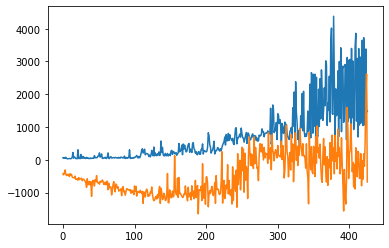

In [ ]:
print(mean_absolute_error(y_test, lso.predict(X_scaled_test)))
plt.plot(range(len(y_test)), y_test)
plt.plot(range(len(y_test)), lso.predict(X_scaled_test))

In [ ]:
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor

regr = RandomForestRegressor(max_features=1/3, n_estimators=500)
regr.fit(X_scaled_train, y_train)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features=0.3333333333333333,
                      max_leaf_nodes=None, max_samples=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=500,
                      n_jobs=None, oob_score=False, random_state=None,
                      verbose=0, warm_start=False)

532.2947981220657


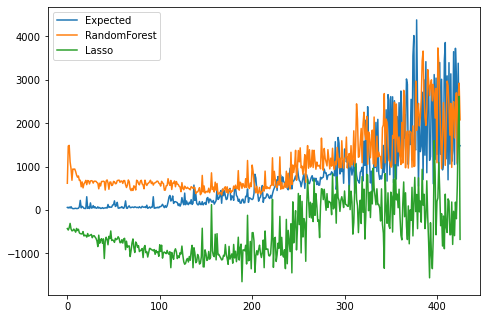

In [ ]:
print(mean_absolute_error(y_test, regr.predict(X_scaled_test)))

fig = plt.figure()

ax = fig.add_axes([0,0,1,1])

plt.plot(range(len(y_test)), y_test, label="Expected")
plt.plot(range(len(y_test)), regr.predict(X_scaled_test), label="RandomForest")
plt.plot(range(len(y_test)), lso.predict(X_scaled_test), label="Lasso")

ax.legend()